# Name : Piyush Sharma 

# Organisation : The Sparks Foundation

# Task 2 : Prediction using Unsupervised ML


## Importing libraries

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
from kneed import KneeLocator 

## Reading the file

In [16]:
# Reading data from the url

data = pd.read_csv('Iris.csv') 
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Analyzing the data

In [17]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [18]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [22]:
x = data.iloc[:,1:5]

In [23]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
x.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
dtype: bool

## Applying KMeans Algorithm

In [119]:
# Checking SSE value to determine appropriate number of clusters. 

sse=[]
kmeans_kwargs = {'init':'random','n_init':10,'max_iter':300}

for i in range(1,11):
    kmeans= KMeans(n_clusters=i,**kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
sse     

[767.8643999999998,
 177.78887700534756,
 78.94084142614601,
 59.4381655761024,
 47.07446112266113,
 39.47761881496882,
 35.075979640923634,
 30.98806983700206,
 29.196685975765266,
 27.803628582202112]

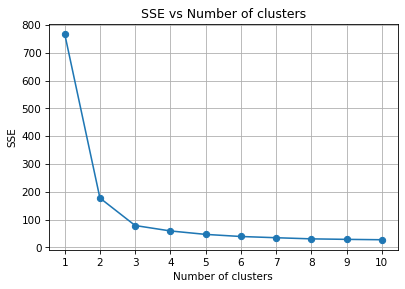

In [121]:
# Checking number of clusters with minimum sse.

plt.figure(dpi=75)
plt.plot(range(1,11),sse,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE vs Number of clusters')
plt.xticks(range(1,11))
plt.grid()

In [122]:
# From above graph we can see that there is sudden decrease in SSE value when number of clusters are decreased from 1 to 2.

# So 2 or 3 clusters will be appropriate for cluster formation.

In [31]:
# To get confirm , we can use kneelocator 
KneeLocator(x=range(1,11),y=sse,curve='convex',direction='decreasing').elbow

3

In [136]:
# Optimum number of clusters = 3

In [123]:
# Fitting the data in algorithm.

kmeans = KMeans(n_clusters=3).fit(x)

In [124]:
# Co-ordinates of clusters center

centroids = kmeans.cluster_centers_
centroids

array([[ 5.90161290e+00,  2.74838710e+00,  4.39354839e+00,
         1.43387097e+00,  1.00000000e+00],
       [ 5.00600000e+00,  3.41800000e+00,  1.46400000e+00,
         2.44000000e-01, -1.11022302e-15],
       [ 6.85000000e+00,  3.07368421e+00,  5.74210526e+00,
         2.07105263e+00,  2.00000000e+00]])

In [42]:
# Adding labels of clusters to dataframe x 
x['labels']= kmeans.labels_
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Clusters formation of the data

In [125]:
# Below Clustering data can only be formed with 2 variable i.e. SepalLength and SepalWidth.

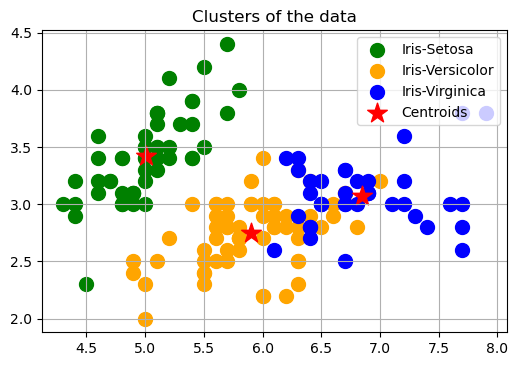

In [135]:
plt.figure(dpi=100)
plt.scatter(x[x['labels']==0].iloc[:,0],x[x['labels']==0].iloc[:,1],s=100,c='g',label='Iris-Setosa')
plt.scatter(x[x['labels']==1].iloc[:,0],x[x['labels']==1].iloc[:,1],s=100,c='orange',label='Iris-Versicolor')
plt.scatter(x[x['labels']==2].iloc[:,0],x[x['labels']==2].iloc[:,1],s=100,c='b',label='Iris-Virginica')
plt.title('Clusters of the data')

plt.scatter(centroids[:,0],centroids[:,1],s=220,marker='*',color='r',label='Centroids')

plt.grid(True)
plt.legend(loc='upper right')